In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
DATA_PATH = '/home/kal/Documents/codeprojects/Unsupervised_Learning/data/monthly_smoothed_agg.csv'

df = pd.read_csv(DATA_PATH)
df = df.drop(['Unnamed: 0', 'loc_id'], axis=1)

df = df.round(5) 
df

,latitude,longitude,0,1,2,3,4,5,6,7,8,9,10,11
0,3.0,33.0,3.05455,5.67288,14.62082,29.84877,38.36230,30.57773,31.03017,32.48731,26.84008,27.41909,20.65744,6.23338
1,3.0,33.5,3.12392,5.53724,13.52705,27.22575,38.09046,31.78701,32.06707,29.68266,22.30056,22.06739,16.43755,5.98746
2,3.0,34.0,3.22565,5.31102,12.67813,24.81498,34.48856,28.62385,32.44486,27.36471,17.44015,17.03505,14.28086,6.07399
3,3.0,34.5,3.16108,4.72177,11.57280,22.80241,29.04014,22.55926,29.80298,22.59298,12.50140,13.54363,14.13963,6.11518
4,3.0,35.0,2.82469,3.82826,9.59315,18.95522,21.76496,15.57653,21.75901,14.15313,6.77502,8.80661,11.82442,5.40861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,15.0,46.0,0.40151,1.56361,2.54797,3.74796,0.88910,0.64444,1.02628,1.50339,0.29367,0.38954,0.20112,0.08971
771,15.0,46.5,0.29540,1.12683,1.53195,2.29401,0.59201,0.68772,1.04494,1.72664,0.35979,0.40738,0.20850,0.06630
772,15.0,47.0,0.40681,1.27329,1.70143,2.51962,1.13425,1.31620,3.18059,5.15222,2.30007,0.77028,0.47399,0.16654
773,15.0,47.5,0.63117,1.74490,2.32568,3.27699,1.53533,1.48285,3.73832,5.95250,2.98736,1.00127,0.70399,0.30541


<Figure size 1500x500 with 0 Axes>

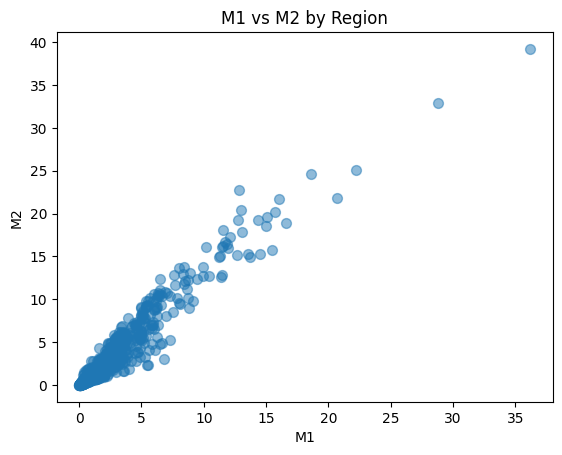

In [80]:

fig = plt.figure(figsize=(15, 5))

df.plot.scatter(x = '0', y = '1', s = 50,  alpha=0.5); 

plt.xlabel('M1')
plt.ylabel('M2')
plt.title('M1 vs M2 by Region')
plt.show()  



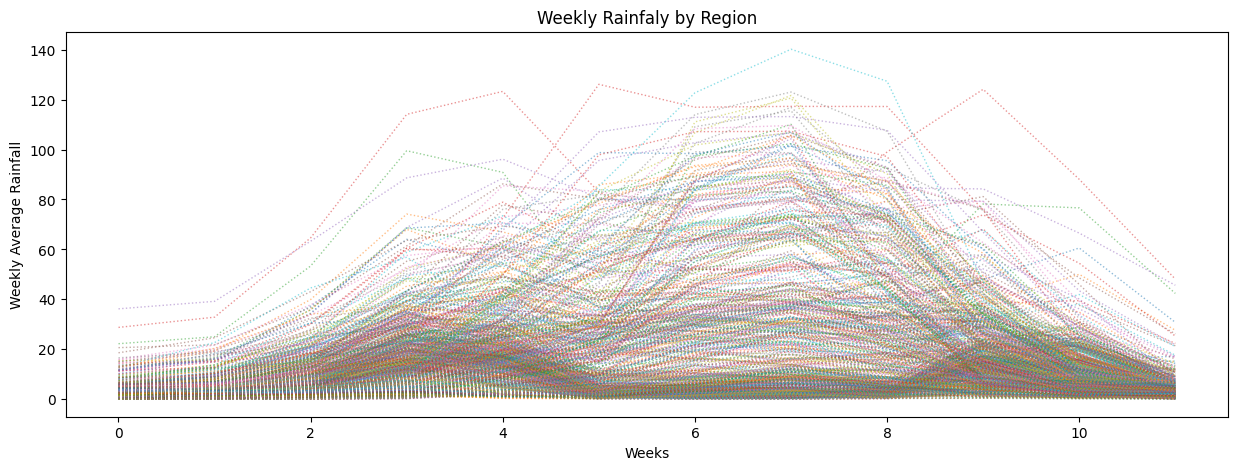

In [81]:
fig = plt.figure(figsize=(15, 5))

for i in range(df.shape[0]):
    ypoints =  df.iloc[i,2:].values.flatten().tolist()
    plt.plot(ypoints, linestyle = 'dotted', linewidth=1, alpha=0.5)

plt.xlabel('Weeks')
plt.ylabel('Weekly Average Rainfall')
plt.title('Weekly Rainfaly by Region')
plt.show() 

In [82]:
data = df.iloc[:,2:].values
data.shape

(775, 12)

In [83]:
def centered(data):
    centered_data = data - np.mean(data,axis=0) 
    return centered_data

In [84]:
def calculate_cov(data):
    num_samples = data.shape[1] 
    cov = (data @ data.T) / num_samples
    return cov

In [85]:
centered_data = centered(data).T
cov = calculate_cov(centered_data)

In [86]:
cov

array([[ 11.77294119,  14.76506512,  24.7717052 ,  32.57204076,
         33.17292815,  33.64321281,  39.4984194 ,  40.52991966,
         36.38657976,  22.36369808,  16.93313123,  12.65404402],
       [ 14.76506512,  19.86032959,  34.30617087,  45.51122643,
         46.04215445,  49.13793645,  62.63333783,  64.87432942,
         55.35550443,  30.34566804,  19.68042779,  14.55592092],
       [ 24.7717052 ,  34.30617087,  67.59624968, 104.58160591,
        102.47227228,  91.29184273, 108.49035543, 108.26281333,
         98.25070534,  72.18889435,  50.75889898,  29.17232705],
       [ 32.57204076,  45.51122643, 104.58160591, 201.41889793,
        197.75230616, 129.56273915, 120.21417339, 108.75606864,
        125.92100487, 151.93684146, 110.86588375,  48.58823762],
       [ 33.17292815,  46.04215445, 102.47227228, 197.75230616,
        281.58779215, 281.61307594, 277.68933822, 274.88121764,
        289.81339781, 232.8713425 , 123.29243865,  50.7984953 ],
       [ 33.64321281,  49.13793645,

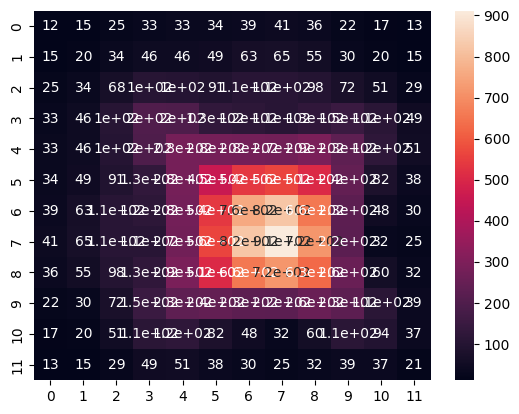

In [87]:
hm = sns.heatmap(data=cov, annot=True) 
plt.show()

In [88]:
def eigen(cov,features_names):
    eigen_values , eigen_vectors = np.linalg.eig(cov)
    # sort the eigenvectors and eigenvalues descending in terms of the eigenvalues
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_features = features_names[sorted_index]
    sorted_eigenvalues = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    return sorted_eigenvalues,sorted_eigenvectors,sorted_features

In [89]:
features_names = np.array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])

In [90]:
eigenvalues, eigenvectors, sorted_features = eigen(cov,features_names)
print(f"Sorted Features: {sorted_features}")
print(f"eigenvalues: {eigenvalues}")
print(f"eigenvectors:\n{eigenvectors}")

Sorted Features: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '11' '10' '9']
eigenvalues: [2.93673215e+03 5.32521684e+02 1.10427765e+02 3.13167869e+01
 2.71824580e+01 2.01959467e+01 8.60297467e+00 6.72492158e+00
 2.08197151e+00 7.89144938e-01 6.75312313e-01 4.44468127e-02]
eigenvectors:
[[-0.0309375  -0.0619487   0.16070487  0.11354812 -0.18983959 -0.29367124
  -0.04295866  0.3209601   0.02538957 -0.28698241  0.46719621 -0.65426865]
 [-0.04671992 -0.07308719  0.23631252  0.08304393 -0.26847449 -0.24000909
  -0.19023789  0.29278521  0.10426286 -0.46048433  0.05977679  0.67204853]
 [-0.08605627 -0.20385714  0.4226372   0.05076326 -0.27916384 -0.20195965
  -0.26367475  0.03175462  0.05646222  0.23104657 -0.68116061 -0.245019  ]
 [-0.11671009 -0.49697876  0.47910947 -0.24290612 -0.02942835  0.22093539
  -0.04382147 -0.47930052  0.08842884  0.06612897  0.39212579  0.05965296]
 [-0.23046824 -0.46661688 -0.10150827 -0.0041498  -0.1513104   0.4913016
   0.42313547  0.45451984 -0.17329113 -0.10871973 -

In [94]:
def pca(data,k,eigenvectors):
    top_eigenvectors = eigenvectors[:,:k]
    F = np.dot(top_eigenvectors.T,data)
    return F, top_eigenvectors

In [95]:
def calculate_error(F,top_eigenvectors,data):
    
    F_inverse = np.dot(top_eigenvectors,F) + np.mean(data,axis=0).reshape(-1,1)
    
    error = np.mean((data.T-F_inverse)**2)
    
    return error,F_inverse.T

In [97]:
for k in range(12,0,-1):
    data_reduced, top_eigenvectors = pca(centered_data,k,eigenvectors)
    error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
    print(f"{k} number of components Error: {error:0.2f}")

12 number of components Error: 0.00
11 number of components Error: 0.00
10 number of components Error: 0.06
9 number of components Error: 0.13
8 number of components Error: 0.30
7 number of components Error: 0.86
6 number of components Error: 1.58
5 number of components Error: 3.26
4 number of components Error: 5.52
3 number of components Error: 8.13
2 number of components Error: 17.34
1 number of components Error: 61.71


In [98]:
k = 4
data_reduced, top_eigenvectors = pca(centered_data,k,eigenvectors)
error, inverse = calculate_error(data_reduced,top_eigenvectors,data)
print(f"{k} number of components Error: {error:0.2f}")

4 number of components Error: 5.52


In [99]:
dataframe = pd.DataFrame.from_records(data_reduced.T)

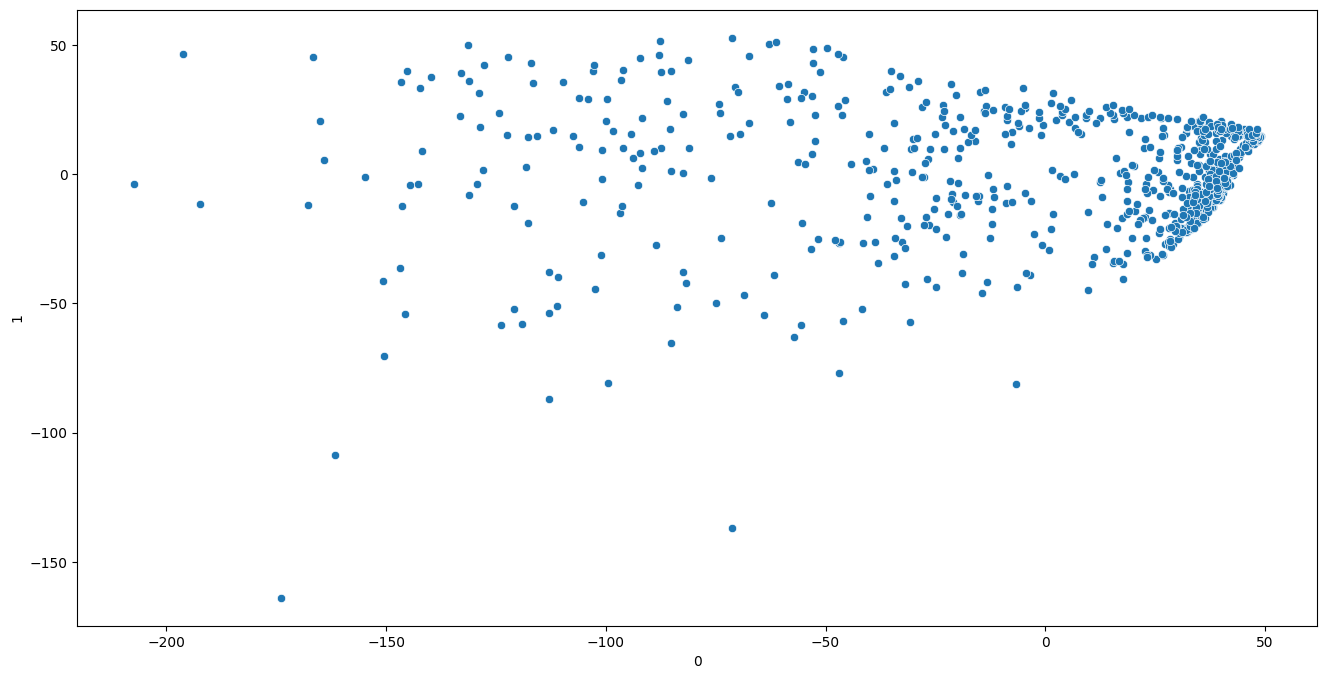

In [100]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.scatterplot(data=dataframe, x=dataframe[0], y=dataframe[1], ax=ax)
plt.show()

In [101]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [102]:
def corr_distance(data, point1, point2):
    pass

In [103]:
def range_query(data, point, epsilon):

    neighbors = []
    for i, data_point in enumerate(data):
        if euclidean_distance(point, data_point) <= epsilon:
            neighbors.append(i)
    return neighbors

In [104]:
def expand_cluster(data, labels, current_point, neighbors, cluster_id, epsilon, min_points):
    labels[current_point] = cluster_id
    queue = neighbors.copy()

    while queue:
        current_neighbor = queue.pop(0)

        if labels[current_neighbor] == -1:
            labels[current_neighbor] = cluster_id
            new_neighbors = range_query(data, data[current_neighbor], epsilon)
            if len(new_neighbors) >= min_points:
                queue.extend(new_neighbors)

        elif labels[current_neighbor] == 0:
            labels[current_neighbor] = cluster_id

In [105]:
def dbscan(data, epsilon, min_points):

    labels = np.full(len(data), -1, dtype=int)

    cluster_id = 0

    for i in range(len(data)):

        if labels[i] != -1:
            continue

        # Find neighbors of the current point
        neighbors = range_query(data, data[i], epsilon)

        # If the number of neighbors is less than min_points, mark the point as noise
        if len(neighbors) < min_points:
            labels[i] = -1  # Noise point
        else:
            # Expand the cluster starting from the current point
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, epsilon, min_points)

    return labels

In [109]:
from sklearn.neighbors import NearestNeighbors

from matplotlib import pyplot as plt


neighbors = NearestNeighbors(n_neighbors = 8)
neighbors_fit = neighbors.fit(data_reduced.T)
distances, indices = neighbors_fit.kneighbors(data_reduced.T)

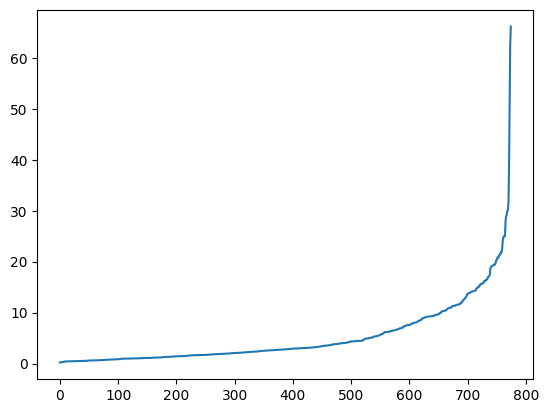

In [110]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [111]:
eps_values = np.arange(5, 35, 2.5)
minPts_values = np.arange(4,12)
len(eps_values), len(minPts_values)

(12, 8)

In [112]:
from itertools import product
params = list(product(eps_values, minPts_values))

In [113]:
from sklearn.metrics import silhouette_score
sil_score = []
for p in params:
    cluster_labels = dbscan(data_reduced.T, p[0], p[1])
    if len(set(cluster_labels)) > 1:
        sil_score.append(silhouette_score(data_reduced.T, cluster_labels))
    else:
        sil_score.append(np.nan)

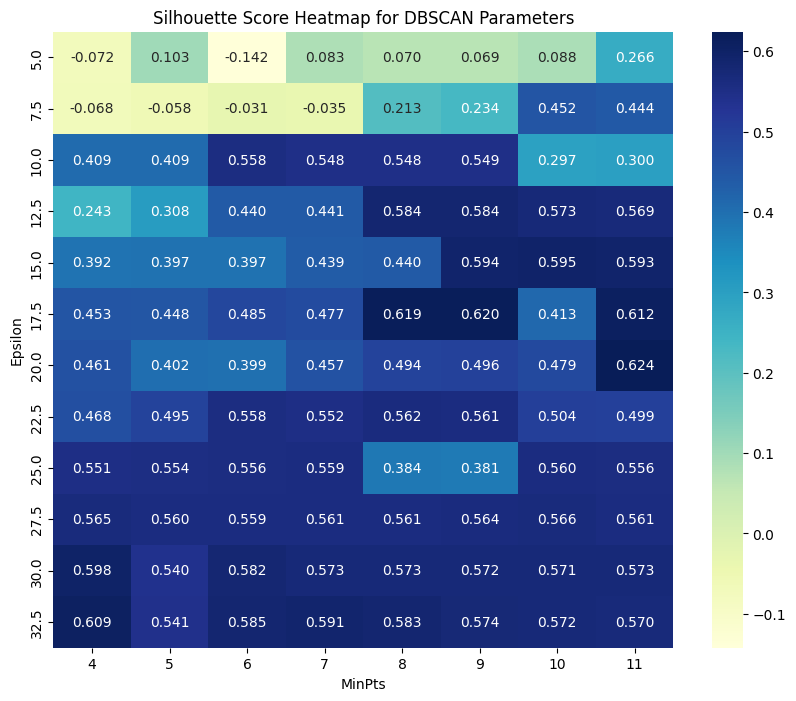

In [114]:
# Create a DataFrame to store the results
df = pd.DataFrame({'Epsilon': [p[0] for p in params],
                   'MinPts': [p[1] for p in params],
                   'Silhouette Score': sil_score})

# Create a pivot table for the heatmap
pivot_df = df.pivot(index='Epsilon', columns='MinPts', values='Silhouette Score')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('Silhouette Score Heatmap for DBSCAN Parameters')
plt.show()

In [117]:
cluster_labels = dbscan(data_reduced.T, 20,8)
for num in np.unique(cluster_labels): print(f"Cluster {num}: {sum(cluster_labels==num)}")

Cluster -1: 82
Cluster 1: 658
Cluster 2: 27
Cluster 3: 8


In [123]:
cluster_labels = dbscan(data_reduced.T, 18,4)
for num in np.unique(cluster_labels): print(f"Cluster {num}: {sum(cluster_labels==num)}")

Cluster -1: 57
Cluster 1: 672
Cluster 2: 5
Cluster 3: 41


In [124]:
data.shape

(775, 12)

In [125]:
cluster_labels.astype(float)
cluster_labels.shape

(775,)

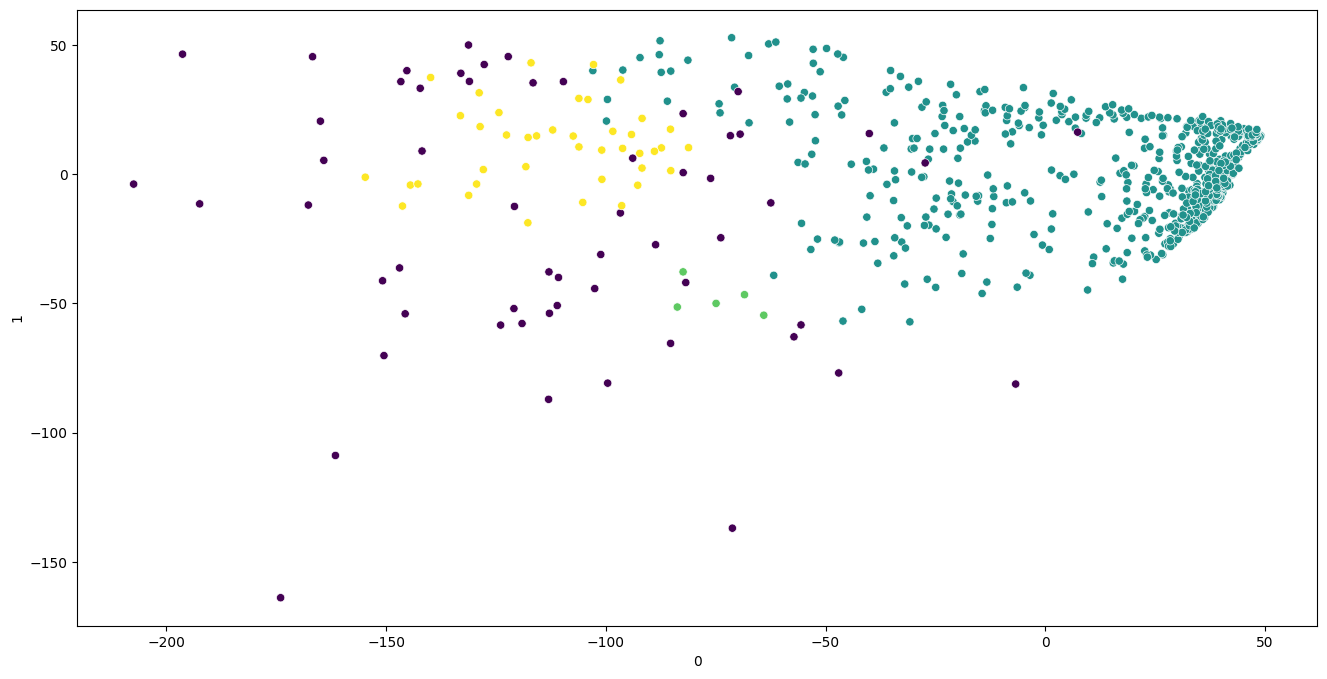

In [126]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data=dataframe, x=dataframe[0], y=dataframe[1], c=cluster_labels.astype(float), ax=ax)
plt.show()

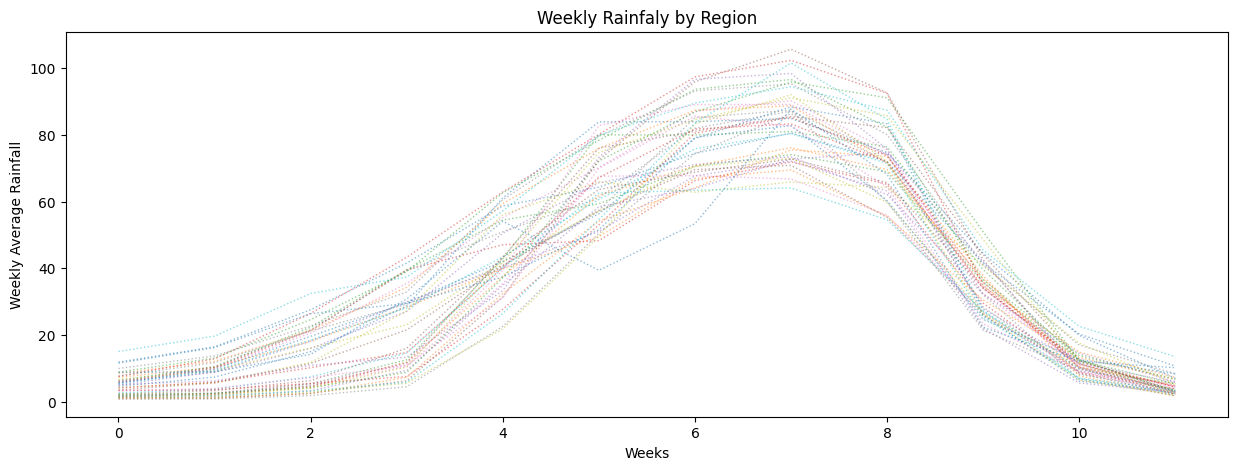

In [130]:
fig = plt.figure(figsize=(15, 5))

for i in range(data.shape[0]):
    if (cluster_labels[i] == 3): 
        plt.plot(data[i], linestyle = 'dotted', linewidth=1, alpha=0.5)

plt.xlabel('Weeks')
plt.ylabel('Weekly Average Rainfall')
plt.title('Weekly Rainfaly by Region')
plt.show()   

1